# Hyperparameter sensitivity

Analyzing the sensitivity of a gradient boosting model to its different hyperparameters, based on the results of the grid search conducted in [`search.py`](search.py).

In [1]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns

from search import GradientBoostingHandler  # required for pickle loading to work

plt.set_loglevel("WARNING")
sns.set_theme(style="whitegrid")

In [2]:
with open("results/grid_population.p", "rb") as fin:
    population = pickle.load(fin)
df = pd.DataFrame([ind.hyperparameters | {"fitness": ind.fitness} for ind in population])
df.sort_values(by=list(df.columns[:-1]), inplace=True)
df

,learning_rate,max_leaf_nodes,max_depth,min_samples_leaf,max_features,fitness
0,0.01,4.0,3.0,1,0.25,0.139170
1,0.01,4.0,3.0,1,0.50,0.172721
2,0.01,4.0,3.0,1,0.75,0.176688
3,0.01,4.0,3.0,1,1.00,0.180716
4,0.01,4.0,3.0,17,0.25,0.143314
...,...,...,...,...,...,...
1019,1.00,NaN,NaN,34,1.00,0.895495
1020,1.00,NaN,NaN,50,0.25,0.901198
1021,1.00,NaN,NaN,50,0.50,0.778230
1022,1.00,NaN,NaN,50,0.75,0.820118


In [3]:
def plot_sensitivity(param, is_int=False):
    fig, ax = plt.subplots()
    formatter = ("{:.0f}" if is_int else "{:.2f}").format
    df_plot = df.assign(**{param: df[param].map(formatter).replace("nan", "None")})
    sns.boxplot(df_plot, x=param, y="fitness", ax=ax)
    ax.set_ylim(0, 1)
    ax.set_title(f"CV R² of model by {param}")
    ax.set_ylabel("R²")

    uniq = df_plot[param].unique()
    for i in range(len(uniq) - 1):
        pvalue = scipy.stats.wilcoxon(
            df_plot[df_plot[param] == uniq[i]].fitness,
            df_plot[df_plot[param] == uniq[i + 1]].fitness
        ).pvalue
        print(f"{param} {uniq[i]} vs {uniq[i + 1]}: Wilcoxon test pvalue = {pvalue}")

learning_rate 0.01 vs 0.05: Wilcoxon test pvalue = 9.640418513895798e-44
learning_rate 0.05 vs 0.22: Wilcoxon test pvalue = 2.737018670322286e-43
learning_rate 0.22 vs 1.00: Wilcoxon test pvalue = 7.273883688813507e-18


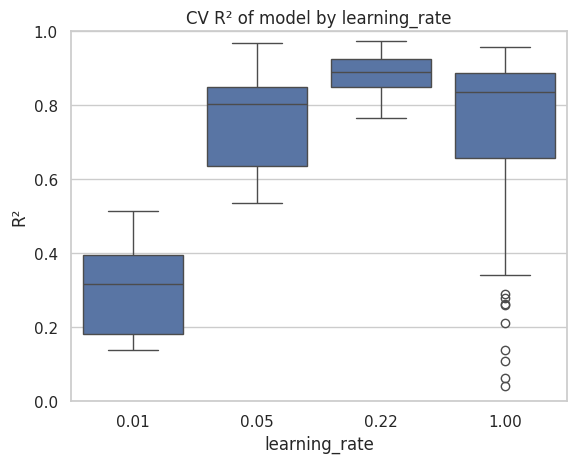

In [4]:
plot_sensitivity("learning_rate")

max_leaf_nodes 4 vs 16: Wilcoxon test pvalue = 2.1472675502513655e-22
max_leaf_nodes 16 vs 128: Wilcoxon test pvalue = 1.647694836669154e-11
max_leaf_nodes 128 vs None: Wilcoxon test pvalue = 0.03443926455634229


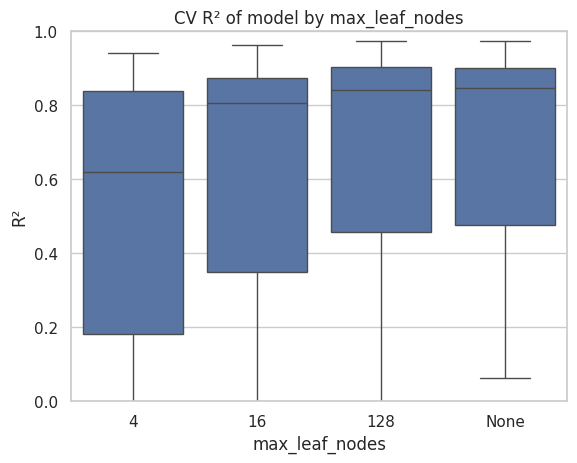

In [5]:
plot_sensitivity("max_leaf_nodes", is_int=True)

max_depth 3 vs 5: Wilcoxon test pvalue = 2.6772397070632617e-18
max_depth 5 vs 8: Wilcoxon test pvalue = 2.7060991020017863e-11
max_depth 8 vs None: Wilcoxon test pvalue = 0.010902905380166783


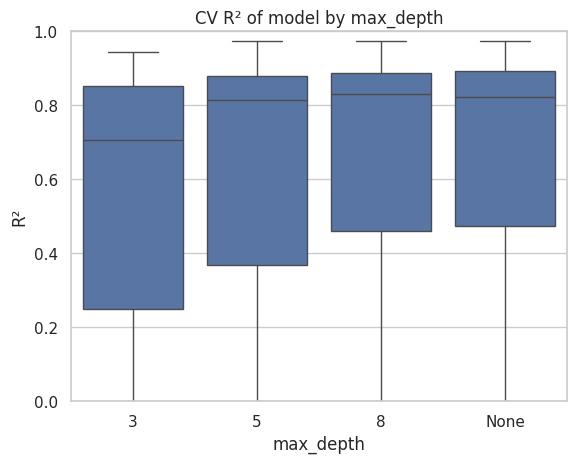

In [6]:
plot_sensitivity("max_depth", is_int=True)

min_samples_leaf 1 vs 17: Wilcoxon test pvalue = 1.8410844658029918e-07
min_samples_leaf 17 vs 34: Wilcoxon test pvalue = 6.167259086011371e-05
min_samples_leaf 34 vs 50: Wilcoxon test pvalue = 2.597346936578744e-05


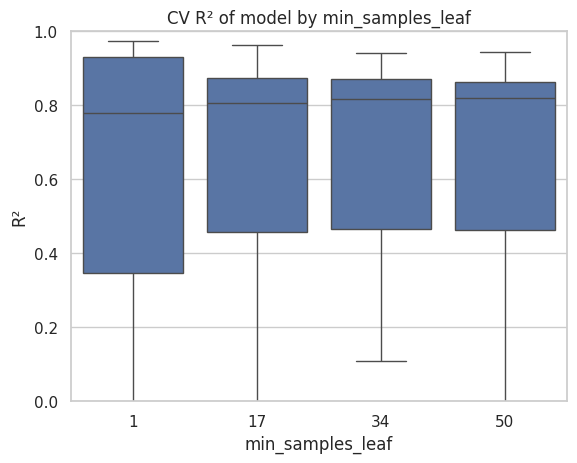

In [7]:
plot_sensitivity("min_samples_leaf", is_int=True)

max_features 0.25 vs 0.50: Wilcoxon test pvalue = 1.7791606670599526e-16
max_features 0.50 vs 0.75: Wilcoxon test pvalue = 1.1428670891772484e-07
max_features 0.75 vs 1.00: Wilcoxon test pvalue = 4.73625841440263e-08


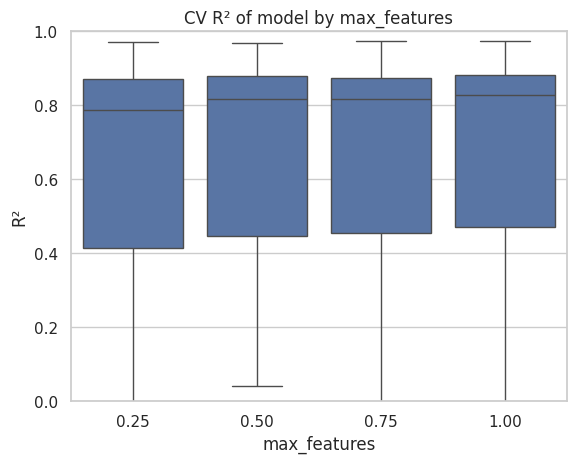

In [8]:
plot_sensitivity("max_features")